In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
housing = pd.read_csv("kc_house_data.csv")

In [57]:
housing1 = housing

In [58]:
housing1.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [59]:
housing1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
housing1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Before implementing a linear regression model, it is important to understand what features (independent variables) will help us predict the price of the house (dependent variable) accurately. And to understand what variables we should include in our model, let's begin by understanding what type of data we have:<br>

<b>Categorical/Nominal</b>: waterfront, view <br>
<b>Ordinal</b>: bedrooms,bathrooms,floors,grade,condition <br>
<b>Continuos</b>: sqft_living, sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15 <br>

Data not feasible for our model <br>
id,date,yr_built, yr_renovated, lat,long 

We're checking for coorealtion between all the variables in our dataset

In [61]:
housing1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Let's create scatter plot to confirm if independent variables are corelated with the dependent variable

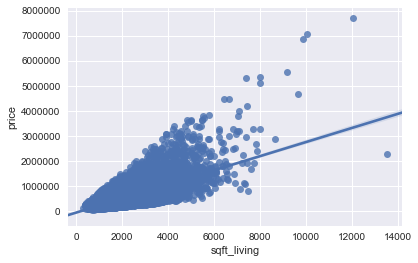

In [62]:
sns.regplot(x='sqft_living',y='price',data=housing1)

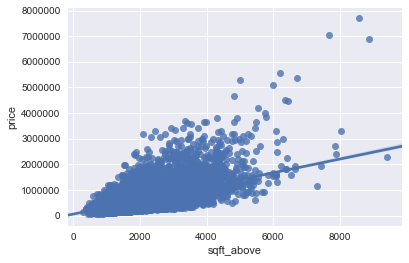

In [63]:
sns.regplot(x='sqft_above',y='price',data=housing1)

For categorical data, we will use strip-plot instead of a scatter plot.

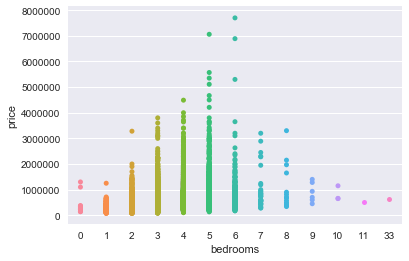

In [64]:
sns.stripplot(x='bedrooms', y='price',data=housing1)

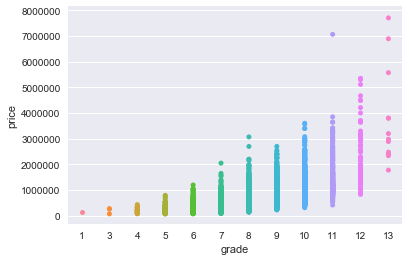

In [65]:
sns.stripplot(x='grade', y='price',data=housing1)

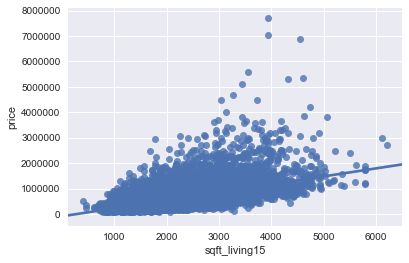

In [66]:
sns.regplot(x='sqft_living15',y='price',data=housing1)

#### Creating linear regression model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### get_dummies function from the pandas library is used to convert qualitative variables such as 'grade' and 'condition' in a series of 0s and 1s, which make it easier to quantify and compare

In [26]:
housing1=pd.get_dummies(housing1,columns=['grade'], drop_first=True)

In [27]:
housing1=pd.get_dummies(housing1,columns=['condition'], drop_first=True)

In [30]:
housing1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,condition_2,condition_3,condition_4,condition_5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
x = housing1[['bedrooms','bathrooms','sqft_living','sqft_living15','sqft_above','waterfront','view','condition_2','condition_3','condition_4','condition_5','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
y = housing1["price"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=3)

In [35]:
regressor = LinearRegression()
regressor.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### R Squared Score for our model. In general, the higher the value of R Squared, the better your linear model can explain variation

In [36]:
regressor.score(x_test, y_test)

0.64500995112435278

#### Linear coefficients for the best fitted regression line

In [37]:
regressor.coef_

array([[ -1.49607532e+04,   2.26517556e+03,   1.79565175e+02,
          2.01627568e+01,  -5.70426074e+01,   5.48811540e+05,
          5.33766597e+04,  -2.33928945e+04,  -2.45919900e+04,
          2.17928157e+04,   1.01134293e+05,   9.59295967e+03,
          4.92915734e+04,   3.03497196e+04,   7.05783987e+04,
          1.08109774e+05,   1.77108908e+05,   3.09437735e+05,
          4.97929636e+05,   7.84771532e+05,   1.14272437e+06,
          2.70343620e+06]])

#### y-intercept of the line. It is the value of dependent variable (price of house in this case) when all the independent variables have value zero. The y-intercept value may not make sense in real-world situations (as demonstrated in this case)

In [38]:
regressor.intercept_

array([ 73804.78934163])

### Now, let's check for over-fitting and multi-collinearity

Over-fitting check is important because we see a lot independent variables being highly corelated with each other. We want each independent variable to be coorealted with the dependent variable but not with other independent variables. If that happens, even though we add more features or independent variables, they may add nothing to our model.For example,sqft_living and bathrooms have a coorelation of 0.75; same is the case with sqft_living and sqft_living15.
Let's use scatter plot to confirm this understanding

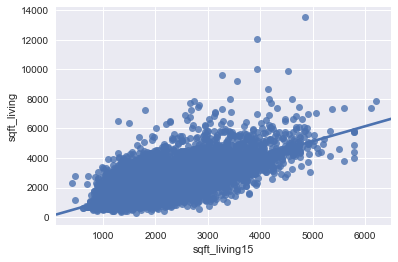

In [161]:
sns.regplot(x='sqft_living15',y='sqft_living',data=housing1)

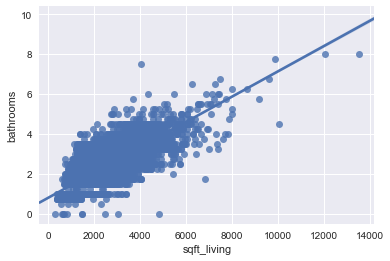

In [114]:
sns.regplot(x='sqft_living',y='bathrooms',data=housing1)

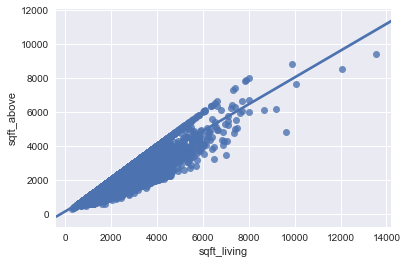

In [115]:
sns.regplot(x='sqft_living',y='sqft_above',data=housing1)

#### Now let's eliminate these independent variables and reassess the accuracy of our model

In [47]:
x2 = housing1[['bedrooms','sqft_living','waterfront','view','condition_2','condition_3','condition_4','condition_5','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
y2 = housing1["price"]
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2, y2, random_state=3)
regressor = LinearRegression()
regressor.fit(pd.DataFrame(x_train2), pd.DataFrame(y_train2))
regressor.score(x_test2, y_test2)

0.64457073837106682

#### As you can see, inspite of eliminating three indepedent variables, the accuracy of our model still remains same. This means we've successfully eliminated variables/features that did not add anything to the model

In [54]:
regressor.predict(x_test2)

array([[  422074.53524681],
       [ 1138383.20157773],
       [  770829.6901435 ],
       ..., 
       [  312681.83476592],
       [  431983.70148907],
       [  432138.7504479 ]])